# Week 7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Great content about what to be careful about in linear regression modeling
# Update scikit-learn with:
# pip install -U scikit-learn

## Day 3: Logistic Regression
The final step in our adventure with regression models is the **logistic regression**.

Unlike the linear and nonlinear regression models which return predicted values in infinite intervals (at least in theory), the logistic regression is set up in such a way that it returns values in the interval $(0, 1)$, regardles of the size of the inputs. This makes the logistic model a great candidate for application in **classification problems** where the outcome is a categorical variable.

Today we use the logistic regression to model probability in *binary classification problems* in which the target variable has only two classes. We choose one class that we target, and label it by $1$; the remaining data is labeled by $0$.

The logistic regression is uses the **logit function**, also known as **sigmoid function** to build the model. This function is given by:
\begin{equation} f(x) = \frac{1}{1 + e^{-x}} \quad \text{or} \quad f(x) = \frac{e^x}{e^x + 1}\end{equation}
Here is the graph of the function:

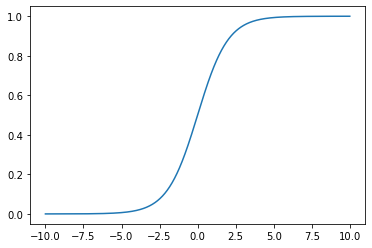

In [2]:
f = lambda x: 1/(1+np.exp(-x))
xs = np.linspace(-10, 10, 1000)
plt.figure()
plt.plot(xs, f(xs))
plt.show()

To construct the logistic regression model, first we must encode the target variable, one category with 1, the other with 0 (the efficiency of the model will be the same regrdless of the choice). Then the coefficients of the actual model are obtained in a *least squares* proces similar to the one we described in the case of linear regression.

Once we obtain the model, we can perform the classification based on the probability $p$ that the model gives us:
* If $p \geqslant 0.5$, then classify the input as category $1$
* If $p < 0.5$, then classify the input as category $0$

Let's illustrate this on some examples.

### Example 1
The data in `premium_membership.csv` contain info about the hourly wage of people and whether they have paid for premium membership for some service.
* Build a logistic classification model based on which classification can be performed
* Plot the data and the model to informally establish if the model is useful
* Make predictions and compare them to the actual data

,hourly_wage,premium_membership
0,13.4,0
1,17.7,0
2,15.4,0
3,20.2,0
4,18.5,0


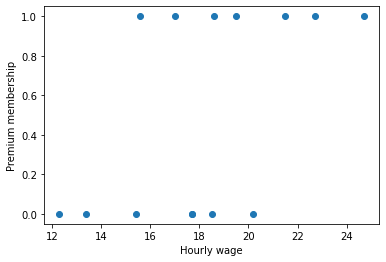

In [3]:
# Load the data
df = pd.read_csv('premium_membership.csv')
display(df.head())
X = np.array(df['hourly_wage']).reshape(-1, 1)
y = np.array(df['premium_membership'])

# Plot the data
plt.figure()
plt.scatter(X, y)
plt.xlabel('Hourly wage')
plt.ylabel('Premium membership')
plt.show()

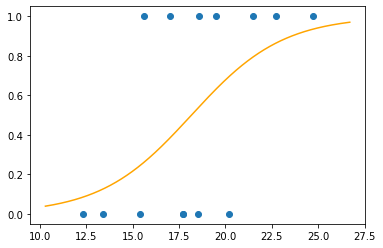

In [4]:
# Build the model
model = LogisticRegression()
model.fit(X, y)

#plotting data and model on the same graph
xs = np.linspace(X.min()-2, X.max()+2, 1000)
ys = model.predict_proba(xs.reshape(-1, 1))
plt.figure()
plt.plot(xs, ys[:,1], c='orange')
plt.scatter(X, y)
plt.show()

[[5 2]
 [2 5]]


0.7142857142857143

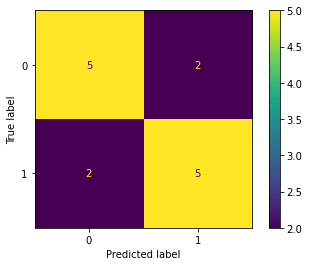

In [5]:
# Making predictions
y_pred = model.predict(X)

# Comparing y and y_pred
print(confusion_matrix(y, y_pred))
plot_confusion_matrix(model, X, y)

# Stating the score
model.score(X, y)

### Example 2
The file `train_gender.csv` contains data about the height, weight and gender of some number of people. The goal is to come up with a model that can predict the gender of a person based on the other variables. The models you build should be tested on the data given in `test_gender.csv`
* Transform the target variable in a form that can be used by the logistic model
* Build a model for predicting the gender using height
* Build a second model for predicting the gender using weight
* Finally, build a model for predicting the gender using both height and weight

In [6]:
# Load the data
df_train = pd.read_csv('train_gender.csv')
df_test = pd.read_csv('test_gender.csv')

# Encoding the target variable
encoder = OrdinalEncoder()
df_train['target'] = encoder.fit_transform(np.array(df_train['gender']).reshape(-1, 1))
df_test['target'] = encoder.transform(np.array(df_test['gender']).reshape(-1, 1))

print('Train set:')
display(df_train.head())

print('Test set:')
display(df_test.head(20))

Train set:


,height,weight,gender,target
0,170.6,82.9,M,1.0
1,164.9,72.2,M,1.0
2,180.6,94.2,M,1.0
3,176.7,87.2,M,1.0
4,171.1,81.3,M,1.0


Test set:


,height,weight,gender,target
0,175.6,93.8,M,1.0
1,179.2,89.2,M,1.0
2,163.7,72.1,M,1.0
3,190.5,103.0,M,1.0
4,185.8,88.0,M,1.0
5,178.3,86.1,M,1.0
6,186.9,101.0,M,1.0
7,173.9,87.0,M,1.0
8,165.1,68.7,M,1.0
9,166.6,86.2,M,1.0


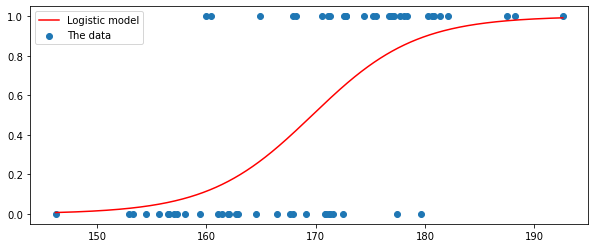

Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.7833333333333333
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.8


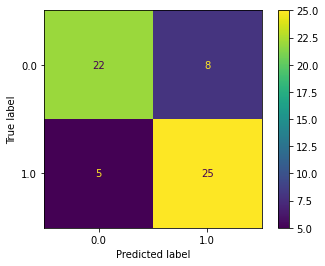

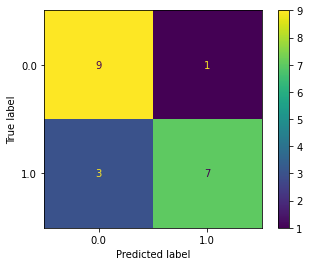

In [7]:
# Preparing the data for train and test
y = np.array(df_train['target'])
X_h = np.array(df_train['height']).reshape(-1, 1)
y_test = np.array(df_test['target'])
X_h_test = np.array(df_test['height']).reshape(-1, 1)

# Building the model based on height
model_h = LogisticRegression()
model_h.fit(X_h, y)

#plotting data and model on the same graph
xs = np.linspace(X_h.min(), X_h.max(), 1000)
ys = model_h.predict_proba(xs.reshape(-1, 1))
plt.figure(figsize=(10,4))
plt.plot(xs, ys[:,1], c='r', label='Logistic model')
plt.scatter(X_h, y, label='The data')
plt.legend()
plt.show()


# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
plot_confusion_matrix(model_h, X_h, y)
print('Accuracy: ', model_h.score(X_h, y))

print('Evaluating the model on the TEST data (appropriate):')
plot_confusion_matrix(model_h, X_h_test, y_test)
print('Accuracy: ', model_h.score(X_h_test, y_test))

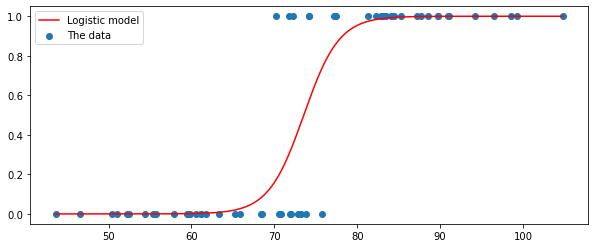

Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.9166666666666666
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.85


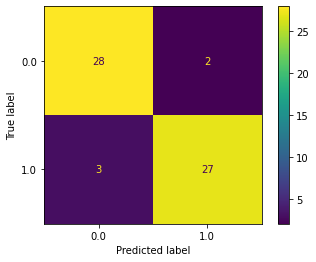

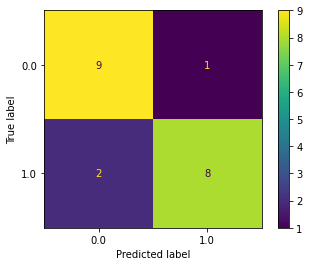

In [8]:
# Preparing the data for train and test
X_w = np.array(df_train['weight']).reshape(-1, 1)
X_w_test = np.array(df_test['weight']).reshape(-1, 1)

# Building the model based on weight
model_w = LogisticRegression()
model_w.fit(X_w, y)

#plotting data and model on the same graph
xs = np.linspace(X_w.min(), X_w.max(), 1000)
ys = model_w.predict_proba(xs.reshape(-1, 1))
plt.figure(figsize=(10,4))
plt.plot(xs, ys[:,1], c='r', label='Logistic model')
plt.scatter(X_w, y, label='The data')
plt.legend()
plt.show()


# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
plot_confusion_matrix(model_w, X_w, y)
print('Accuracy: ', model_w.score(X_w, y))

print('Evaluating the model on the TEST data (appropriate):')
plot_confusion_matrix(model_w, X_w_test, y_test)
print('Accuracy: ', model_w.score(X_w_test, y_test))

Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.9833333333333333
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.9


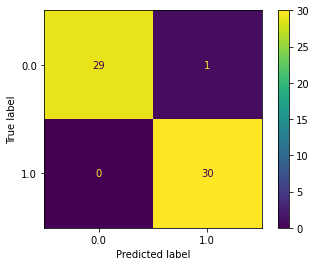

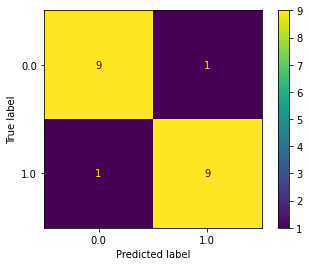

In [9]:
# Preparing the data for train and test
X_hw = np.array(df_train[['height', 'weight']])
X_hw_test = np.array(df_test[['height', 'weight']])

# Building the model based on height and weight
model_hw = LogisticRegression()
model_hw.fit(X_hw, y)

# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
plot_confusion_matrix(model_hw, X_hw, y)
print('Accuracy: ', model_hw.score(X_hw, y))

print('Evaluating the model on the TEST data (appropriate):')
plot_confusion_matrix(model_hw, X_hw_test, y_test)
print('Accuracy: ', model_hw.score(X_hw_test, y_test))

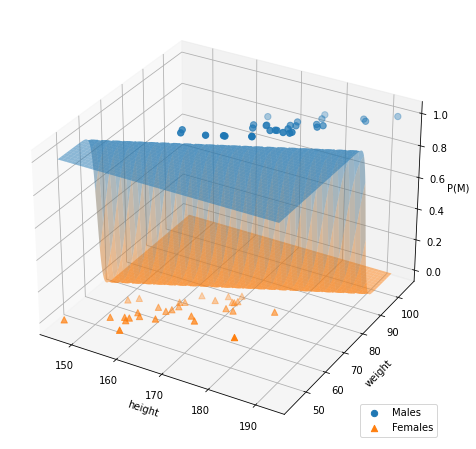

In [10]:
%matplotlib inline
# Color-coding the gender data for the 3D scatter plot
xm = df_train.loc[df_train['gender'] == 'M']['height']
ym = df_train.loc[df_train['gender'] == 'M']['weight']
zm = df_train.loc[df_train['gender'] == 'M']['target']

xf = df_train.loc[df_train['gender'] == 'F']['height']
yf = df_train.loc[df_train['gender'] == 'F']['weight']
zf = df_train.loc[df_train['gender'] == 'F']['target']

# Creating the surface for the model
xs = np.linspace(X_hw[:,0].min(), X_hw[:,0].max(), 1000)
ys = np.linspace(X_hw[:,1].min(), X_hw[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model_hw.intercept_[0]
b_h = model_hw.coef_[0][0]
b_w = model_hw.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_h*xs + b_w*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:orange', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm, ym, zm, marker='o', s=40, label = 'Males')
ax2.scatter(xf, yf, zf, marker='^', s=40, label = 'Females')
ax2.set_xlabel('height')
ax2.set_ylabel('weight')
ax2.set_zlabel('P(M)')
ax2.legend(loc='lower right')
plt.show()